<a href="https://colab.research.google.com/github/patonky/classes/blob/master/LM_Fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as mp
import matplotlib.pyplot as plt

**Download the data from the web**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#check that we have all the information we need
len(train_images)

60000

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
len(test_labels)

10000

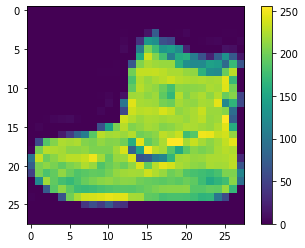

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [ ]:
#preprocess the image data divide the values from 0 to 1
train_images = train_images/255.0
test_images = test_images /255.0

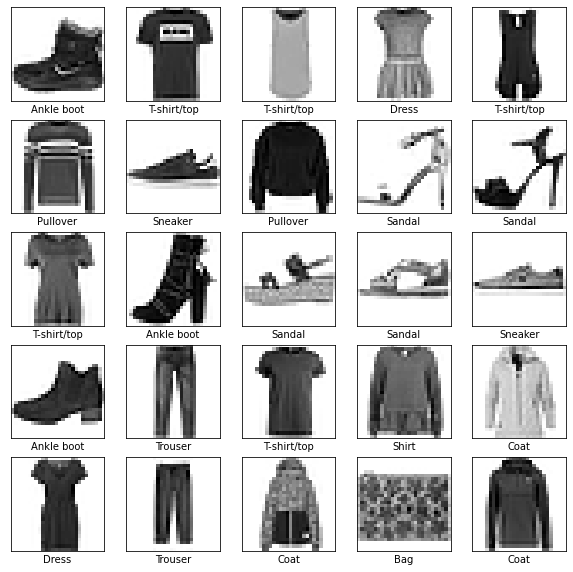

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
#HERE WE ARE GOING TO MAKE OUR MODEL!!! ALL THE WORK BEFORE THIS POINT WAS ONLY IMPORTING AND CHECKING THE DATASET
#keras sequential describes the architecture of the neural network
#128 is the number of neurons on teh first layer, you can experiment
#dense 10 -- the final number should be the same number of classes

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [ ]:
tf.optimizers.Adam()

In [ ]:
#LETS CREATE A MEASURE TO CHECK HOW OUR MODEL IS PERFORMING
#measruing how well our model is doing
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#HERE WE TRAIN OUR MODEL
model.fit(train_images, train_labels, epochs=5)
#the more epochs teh more accurracy....if you have a complex model you might add epochs but it will increase your computation time

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6323 - accuracy: 0.7816
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3799 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3466 - accuracy: 0.8706
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2924 - accuracy: 0.8906


In [ ]:
#HERE WE TEST OUR MODEL AGAINS THE TEST DATASET THAT IT HASN'T SEEN BEFORE
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3625 - accuracy: 0.8676
Test Accuracy 0.8676000237464905


In [ ]:
prediction = model.predict(test_images)

In [ ]:
#this represent the confidence to each of the layers of clothing, you can see which label it is more confident that this will be
prediction[0]

array([4.7295202e-05, 1.7759326e-07, 1.4172689e-06, 1.2978374e-07,
       8.5222782e-06, 6.8804398e-03, 6.6683249e-05, 2.6237679e-01,
       9.2041577e-05, 7.3052651e-01], dtype=float32)

In [ ]:
mp.argmax(prediction[0])

9

In [ ]:
test_labels[0]

9

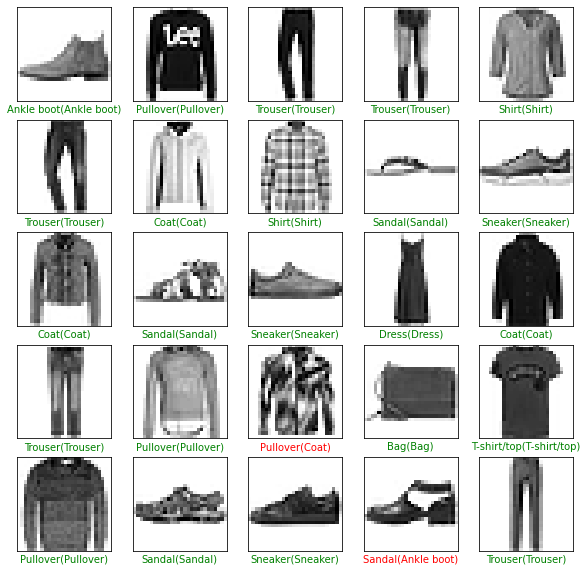

In [ ]:
#PLOTT THE MODEL PREDICTIONS ON THE TEST DATASET, GREEN FOR THE CORRECT ONES AND RED FOR THE WRONG ONES
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = mp.argmax(prediction[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color='green'
  else:
      color = 'red'
 
  plt.xlabel("{}({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color = color)

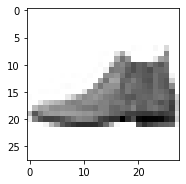

In [ ]:
#lets plot image 0
i = 0
plt.figure(figsize= (6,3))
plt.subplot(1,2,1)
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()